In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read Data

In [2]:
df = pd.read_csv("/Users/aiden/Desktop/4. Tableau/1. Online_Retail_20240721/OnlineRetail.csv", encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Month,Month (Cap),Year,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-Dec-10,Dec,DEC,2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-Dec-10,Dec,DEC,2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom


In [4]:
df = df[df['Country']=='United Kingdom'] #Filtering the countries only with United Kingdom

# Exploratory Data Analysis

### Objectivbes of EDA
Understanding Data Structure <br>
Identifying Pastterns and Trends <br>
Spotting Anomalies <br>
Testing Hypotheses <br>
Informing Further Analysis

In [5]:
df.describe() #Customer ID has many missing values

,Quantity,Year,UnitPrice,CustomerID
count,495478.000000,495478.000000,495478.000000,361878.000000
mean,8.605486,2010.919018,4.532422,15547.871368
std,227.588756,0.272808,99.315438,1594.402590
min,-80995.000000,2010.000000,-11062.060000,12346.000000
25%,1.000000,2011.000000,1.250000,14194.000000
50%,3.000000,2011.000000,2.100000,15514.000000
75%,10.000000,2011.000000,4.130000,16931.000000
max,80995.000000,2011.000000,38970.000000,18287.000000


In [6]:
df[df['CustomerID'].isnull()] #Brief Information on the rows which have Null Customer ID

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Month,Month (Cap),Year,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-Dec-10,Dec,DEC,2010,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-Dec-10,Dec,DEC,2010,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-Dec-10,Dec,DEC,2010,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-Dec-10,Dec,DEC,2010,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-Dec-10,Dec,DEC,2010,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-Dec-11,Dec,DEC,2011,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-Dec-11,Dec,DEC,2011,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-Dec-11,Dec,DEC,2011,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-Dec-11,Dec,DEC,2011,10.79,NaN,United Kingdom


## Data Cleaning - Removing all the rows which do not have valid CustomerID

In [7]:
df = df[df["CustomerID"].notnull()] #Removing the rows which have Null Customer ID

In [8]:
df.describe() # Description of the numerical values

,Quantity,Year,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000,361878.000000
mean,11.077029,2010.932198,3.256007,15547.871368
std,263.129266,0.251406,70.654731,1594.402590
min,-80995.000000,2010.000000,0.000000,12346.000000
25%,2.000000,2011.000000,1.250000,14194.000000
50%,4.000000,2011.000000,1.950000,15514.000000
75%,12.000000,2011.000000,3.750000,16931.000000
max,80995.000000,2011.000000,38970.000000,18287.000000


In [9]:
df.info() #Not Null Values counting and Data Type

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   Month        361878 non-null  object 
 6   Month (Cap)  361878 non-null  object 
 7   Year         361878 non-null  int64  
 8   UnitPrice    361878 non-null  float64
 9   CustomerID   361878 non-null  float64
 10  Country      361878 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 33.1+ MB


In [10]:
import datetime

In [11]:
dtt = pd.to_datetime(df['InvoiceDate']) #Just in case, to remove affecting original data, I used dtt

/var/folders/hv/llybz3dd385174b1m_6dlv5m0000gn/T/ipykernel_5380/3992453335.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt =pd.to_datetime(df['InvoiceDate']) #Just in case, to remove affecting original data, I used dtt


In [12]:
dtt.info() #dtt includes well-converted data.

<class 'pandas.core.series.Series'>
Index: 361878 entries, 0 to 541893
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
361878 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.5 MB


In [13]:
df['Invoice_date'] = dtt
df.head() #Check the values are inserted well or not.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Month,Month (Cap),Year,UnitPrice,CustomerID,Country,Invoice_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-Dec-10,Dec,DEC,2010,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-Dec-10,Dec,DEC,2010,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom,2010-12-01


In [14]:
plt.style.use('_mpl-gallery') #Set up the style of Plot chart

In [15]:
df["Invoice_Month"] = df["Invoice_date"].dt.month #For better structure, I am retrieving the month and year
df["Invoice_Year"] = df["Invoice_date"].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Month,Month (Cap),Year,UnitPrice,CustomerID,Country,Invoice_date,Invoice_Month,Invoice_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-Dec-10,Dec,DEC,2010,2.55,17850.0,United Kingdom,2010-12-01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom,2010-12-01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-Dec-10,Dec,DEC,2010,2.75,17850.0,United Kingdom,2010-12-01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom,2010-12-01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-Dec-10,Dec,DEC,2010,3.39,17850.0,United Kingdom,2010-12-01,12,2010


In [16]:
df["Sales"] = df["UnitPrice"]*df["Quantity"] #Define a Calculated Field

<Axes: xlabel='Invoice_Year,Invoice_Month'>

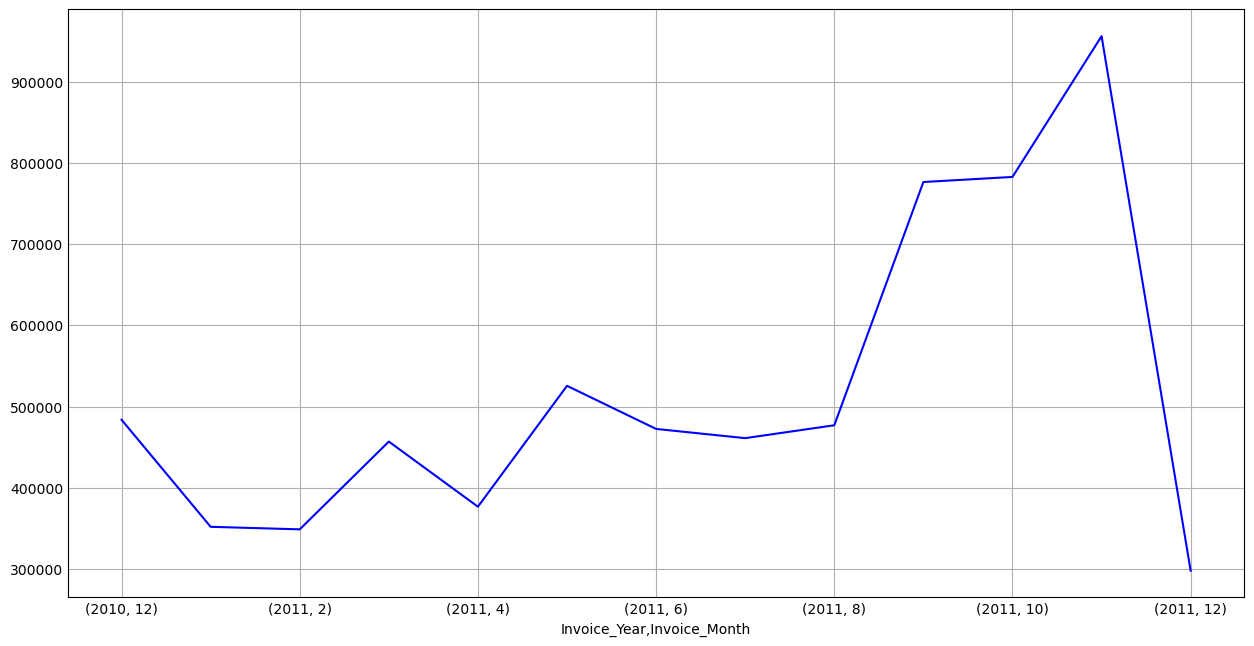

In [18]:
#Sales Report by Month and Year
plt.figure(figsize=(12,6))
df.groupby(by=['Invoice_Year','Invoice_Month'])["Sales"].sum().plot(color="blue")

In [23]:
df.groupby(by=["CustomerID"])["InvoiceNo"].count() #Check how many orders each customer did

CustomerID
12346.0       2
12747.0     103
12748.0    4642
12749.0     231
12820.0      59
           ... 
18280.0      10
18281.0       7
18282.0      13
18283.0     756
18287.0      70
Name: InvoiceNo, Length: 3950, dtype: int64

In [25]:
df[df["CustomerID"]==12748] # Confirm the most frequent value (CustomerID)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Month,Month (Cap),Year,UnitPrice,CustomerID,Country,Invoice_date,Invoice_Month,Invoice_Year,Sales
1016,536521,22854,CREAM SWEETHEART EGG HOLDER,1,01-Dec-10,Dec,DEC,2010,4.95,12748.0,United Kingdom,2010-12-01,12,2010,4.95
3692,536641,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,02-Dec-10,Dec,DEC,2010,4.25,12748.0,United Kingdom,2010-12-02,12,2010,4.25
8448,537136,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,1,05-Dec-10,Dec,DEC,2010,2.95,12748.0,United Kingdom,2010-12-05,12,2010,2.95
8449,537136,85018D,YULETIDE IMAGES S/6 PAPER BOXES,1,05-Dec-10,Dec,DEC,2010,2.55,12748.0,United Kingdom,2010-12-05,12,2010,2.55
8450,537136,21413,PERIWINKLE T-LIGHT HOLDER,1,05-Dec-10,Dec,DEC,2010,1.25,12748.0,United Kingdom,2010-12-05,12,2010,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541855,581580,21351,CINAMMON & ORANGE WREATH,1,09-Dec-11,Dec,DEC,2011,6.75,12748.0,United Kingdom,2011-12-09,12,2011,6.75
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,09-Dec-11,Dec,DEC,2011,2.95,12748.0,United Kingdom,2011-12-09,12,2011,2.95
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,09-Dec-11,Dec,DEC,2011,1.45,12748.0,United Kingdom,2011-12-09,12,2011,1.45
541858,581580,79321,CHILLI LIGHTS,2,09-Dec-11,Dec,DEC,2011,5.75,12748.0,United Kingdom,2011-12-09,12,2011,11.50


### Duplicated Valeus of Invoice No because the stock code in each row is different.

The value of counting and the number of total rows of above table are the same. This means that "counting cell" includes the duplicated cells when they do count.

In this case, counting duplicated cells and removing duplicated cells, both can have meanings. It is up to which points we would like to show.

## Import Google Keywords Data from Dec 2010 - Dec 2011.
### Keyword is "Online Shopping"

This keyword is expected to show general interests on online shopping from people. <br>
The more people search for online shopping on Google, the more sales are generated.

In [26]:
# Google Keywrods data = gk

gk = pd.read_csv("/Users/aiden/Desktop/4. Tableau/1. Online_Retail_20240721/google_keywords.csv")

In [27]:
gk.head()

,Week,Score
0,2009-12-27,100
1,2010-01-03,83
2,2010-01-10,70
3,2010-01-17,72
4,2010-01-24,73


<Axes: >

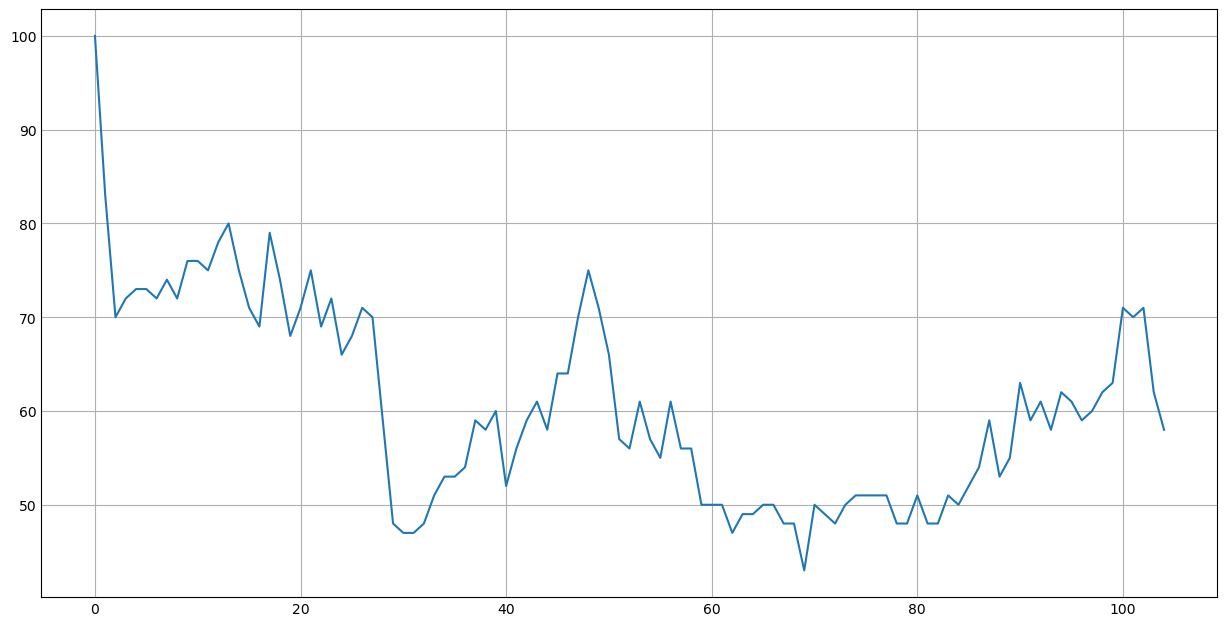

In [30]:
plt.figure(figsize=(12,6))
gk["Score"].plot()

In [31]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Week    105 non-null    object
 1   Score   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [32]:
gk_dtt = pd.to_datetime(gk["Week"])
gk_dtt.head()

0   2009-12-27
1   2010-01-03
2   2010-01-10
3   2010-01-17
4   2010-01-24
Name: Week, dtype: datetime64[ns]

In [33]:
gk["Date"] = gk_dtt

In [35]:
gk.head()

,Week,Score,Date
0,2009-12-27,100,2009-12-27
1,2010-01-03,83,2010-01-03
2,2010-01-10,70,2010-01-10
3,2010-01-17,72,2010-01-17
4,2010-01-24,73,2010-01-24


In [36]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Week    105 non-null    object        
 1   Score   105 non-null    int64         
 2   Date    105 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ KB


In [37]:
gk["Month"] = gk["Date"].dt.month
gk["Year"] = gk["Date"].dt.year

In [38]:
gk.head()

,Week,Score,Date,Month,Year
0,2009-12-27,100,2009-12-27,12,2009
1,2010-01-03,83,2010-01-03,1,2010
2,2010-01-10,70,2010-01-10,1,2010
3,2010-01-17,72,2010-01-17,1,2010
4,2010-01-24,73,2010-01-24,1,2010


In [40]:
avg_gk = gk.groupby(by=["Year","Month"])["Score"].mean()
avg_gk

Year  Month
2009  12       100.00
2010  1         74.20
      2         73.50
      3         77.25
      4         73.50
      5         71.40
      6         69.25
      7         56.00
      8         50.40
      9         57.75
      10        57.20
      11        68.25
      12        62.50
2011  1         58.00
      2         51.50
      3         48.75
      4         47.25
      5         49.60
      6         50.25
      7         49.20
      8         53.75
      9         57.50
      10        60.20
      11        64.00
      12        65.25
Name: Score, dtype: float64

In [43]:
avg_gk = pd.DataFrame(avg_gk)
avg_gk = avg_gk.reset_index()
avg_gk

,Year,Month,Score
0,2009,12,100.00
1,2010,1,74.20
2,2010,2,73.50
3,2010,3,77.25
4,2010,4,73.50
5,2010,5,71.40
6,2010,6,69.25
7,2010,7,56.00
8,2010,8,50.40
9,2010,9,57.75


## Import UK Weather Data (Rainfall, Temperature)
### Rainfall and Temperature are the external factors which are consiered to be able to affect people's decisions.

I would say the harder the wheather is, the more people use online shopping platform.

In [46]:
wth = pd.read_excel("/Users/aiden/Desktop/4. Tableau/1. Online_Retail_20240721/uk_monthly_rainfall_temp.xlsx", sheet_name="Sheet1")

In [47]:
wth.head() #Confirm whether the importing worked well or not.

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,2010,Monthly,JAN,69.5,0.8
1,2010,Monthly,FEB,71.7,1.6
2,2010,Monthly,MAR,65.1,5.5
3,2010,Monthly,MAY,22.1,9.8
4,2010,Monthly,JUN,42.7,14.3


In [50]:
wth.columns = ["Year", "Period", "Month", "Avg_Rainfall", "Avg_Temp"] #Rainfall is "mm" unit and Temp is "Celcius"

In [51]:
wth.head()

,Year,Period,Month,Avg_Rainfall,Avg_Temp
0,2010,Monthly,JAN,69.5,0.8
1,2010,Monthly,FEB,71.7,1.6
2,2010,Monthly,MAR,65.1,5.5
3,2010,Monthly,MAY,22.1,9.8
4,2010,Monthly,JUN,42.7,14.3


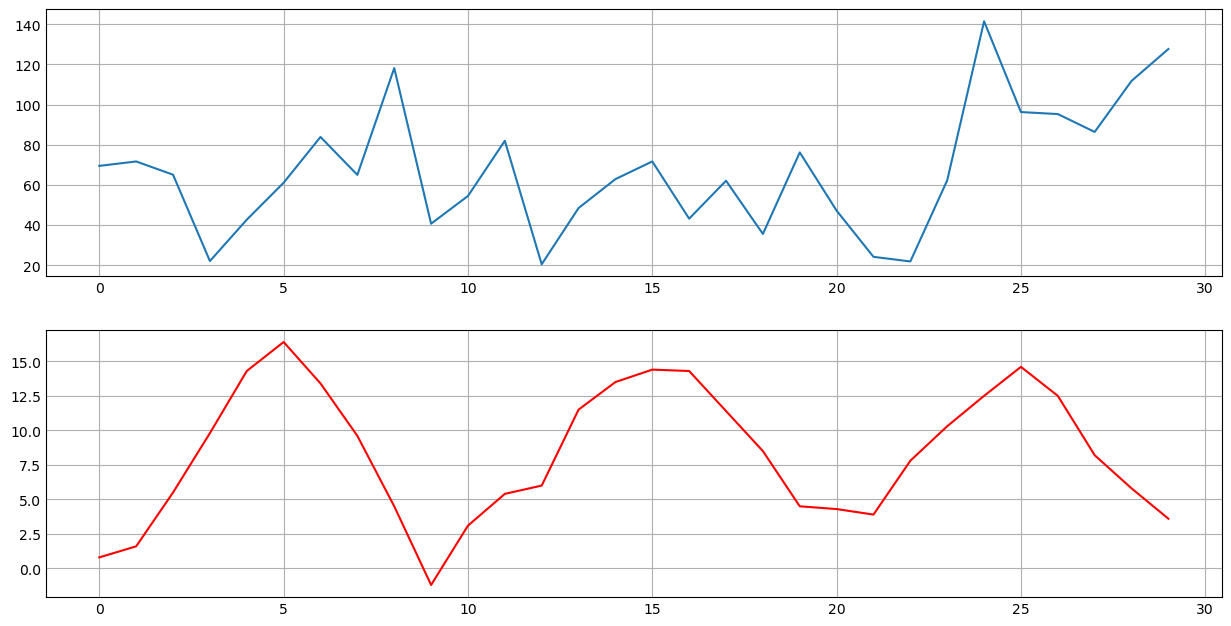

In [64]:
# Create Figure
plt.figure(figsize=(12,6))

# 1st Subplot
plt.subplot(2,1,1)
plt.plot(wth["Avg_Rainfall"])

# 2nd Subplot
plt.subplot(2,1,2)
plt.plot(wth["Avg_Temp"],color='red')

### Define a Dictionary to match the month in English

In [53]:
Month_Num_Eng = {1:"JAN", 2:"FEB", 3:"MAR", 4:"APR", 5:"MAY", 6:"JUN", 7:"JUL", 8:"AUG", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"}

In [60]:
# Match the unit of Month into English
avg_gk["Month"] = avg_gk["Month"].apply(lambda x: Month_Num_Eng[x])
avg_gk

,Year,Month,Score
0,2009,DEC,100.00
1,2010,JAN,74.20
2,2010,FEB,73.50
3,2010,MAR,77.25
4,2010,APR,73.50
5,2010,MAY,71.40
6,2010,JUN,69.25
7,2010,JUL,56.00
8,2010,AUG,50.40
9,2010,SEP,57.75


## Export Data to CSV

In [68]:
avg_gk.to_csv("Google_Keywords_Monthly.csv", index=False) #Google Keywords Result export to csv

In [69]:
df.to_csv("UK_Online_Retail.csv", index=False) #Online Retail data of UK export to csv

In [70]:
wth.to_csv("UK_Weather_Data.csv", index=False) #UK Weather Monthly Data export to csv